In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px  

In [5]:
df = pd.read_csv('wine.csv')
df[:5]

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [7]:
#separate color and quality
features = df.drop(columns=['quality', 'color'])
labels_color = df['color']
labels_quality = df['quality']

#scale
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [9]:
#tSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=200)

tsne_results = tsne.fit_transform(features_scaled)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6497 samples in 0.022s...
[t-SNE] Computed neighbors for 6497 samples in 2.399s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6497
[t-SNE] Computed conditional probabilities for sample 2000 / 6497
[t-SNE] Computed conditional probabilities for sample 3000 / 6497
[t-SNE] Computed conditional probabilities for sample 4000 / 6497
[t-SNE] Computed conditional probabilities for sample 5000 / 6497
[t-SNE] Computed conditional probabilities for sample 6000 / 6497
[t-SNE] Computed conditional probabilities for sample 6497 / 6497
[t-SNE] Mean sigma: 0.697145
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.147186
[t-SNE] KL divergence after 1000 iterations: 1.409055


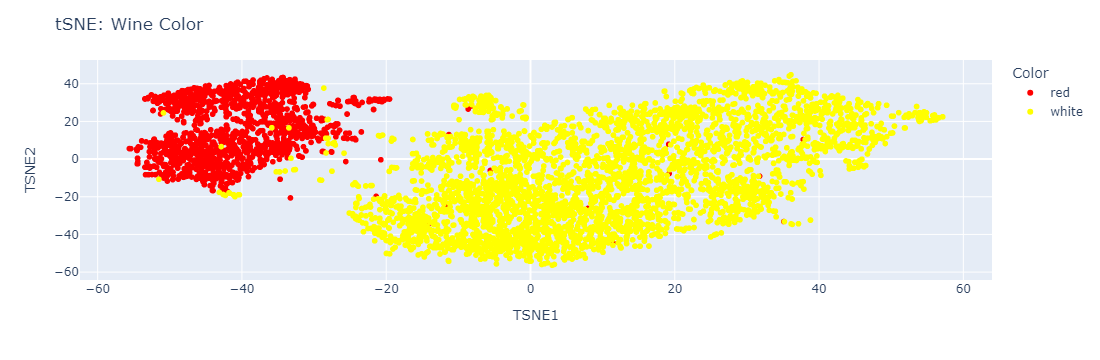

In [173]:
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])

# Add the color and quality labels to the DataFrame
tsne_df['Color'] = df['color']
tsne_df['Quality'] = df['quality']

#plot
fig = px.scatter(tsne_df, 
                 x='TSNE1', 
                 y='TSNE2', 
                 color='Color', 
                 color_discrete_map={'red': 'red', 'white': 'yellow'},  # Set the color mapping
                 hover_data=['Quality'])  # Add quality as hover data# Show the plot
fig.update_layout(title="tSNE: Wine Color")
fig.show()

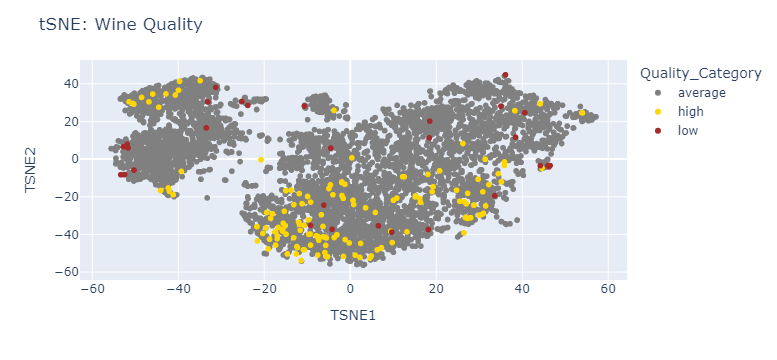

In [171]:
df['Quality_Category'] = pd.cut(df['quality'], 
                                bins=[0, 3, 7, 10], 
                                labels=['low', 'average', 'high'])

# Add the t-SNE results to the DataFrame
tsne_df['Quality_Category'] = df['Quality_Category']

#plot
fig = px.scatter(tsne_df, 
                 x='TSNE1', 
                 y='TSNE2', 
                 color='Quality_Category', 
                 color_discrete_map={'low': 'brown', 'average': 'grey', 'high': 'gold'},  # Set the color mapping
                 hover_data=['Quality_Category', 'Quality'])  # Add both category and quality as hover data# Show the plot
fig.update_layout(title="tSNE: Wine Quality")
fig.show()

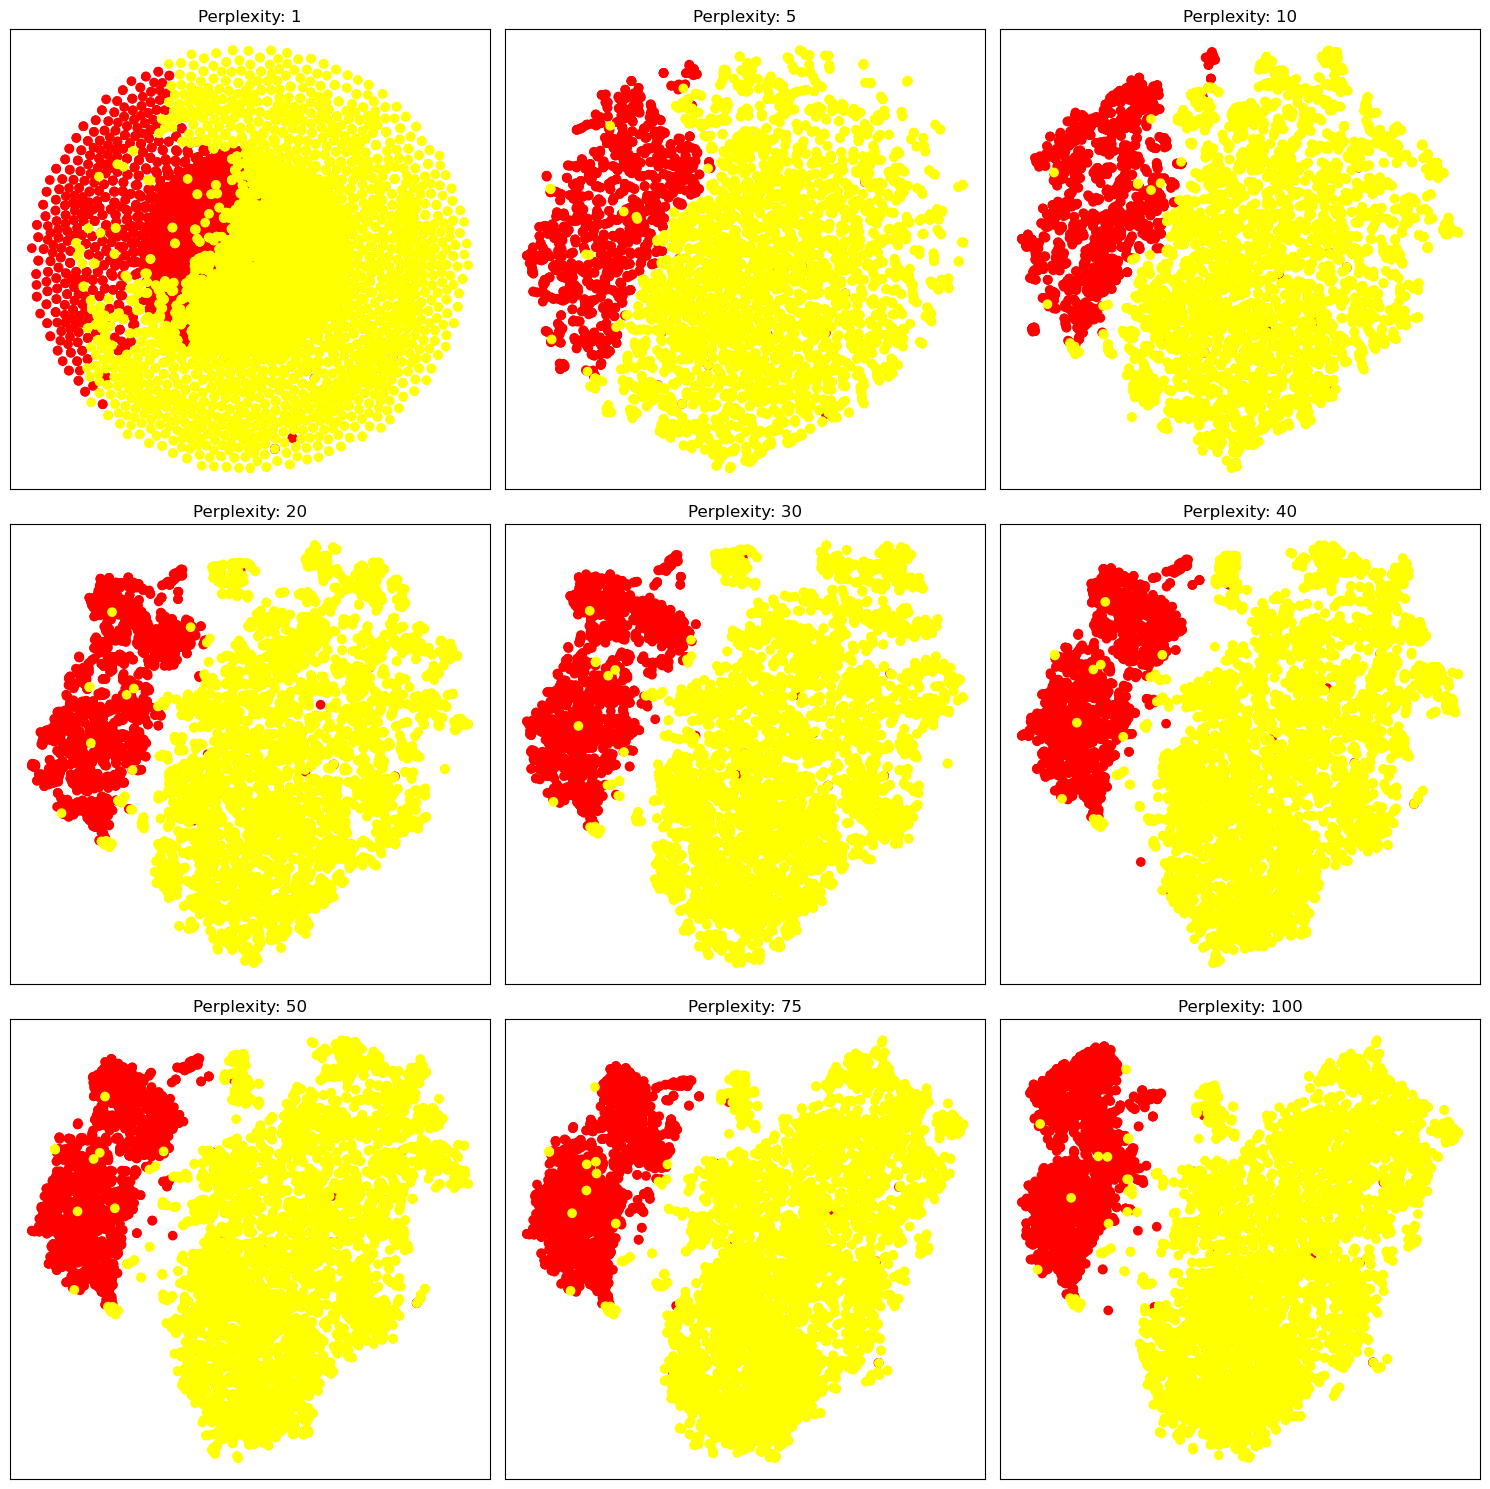

In [31]:
#let's look at different perplexities
perplexities = [1, 5, 10, 20, 30, 40, 50, 75, 100]

#plotting
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

axs = axs.flatten()

#iteration
for i, perplexity in enumerate(perplexities):
    # Run t-SNE with the specified perplexity
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=1000, learning_rate=200)
    tsne_results = tsne.fit_transform(features_scaled)
    
    tsne_df = pd.DataFrame(data=tsne_results, columns=['Dim1', 'Dim2'])
    
    tsne_df['Color'] = df['color']
    
    scatter = axs[i].scatter(tsne_df['Dim1'], tsne_df['Dim2'], 
                             c=tsne_df['Color'].map({'red': 'red', 'white': 'yellow'}))
    axs[i].set_title(f'Perplexity: {perplexity}')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.tight_layout()
plt.show()

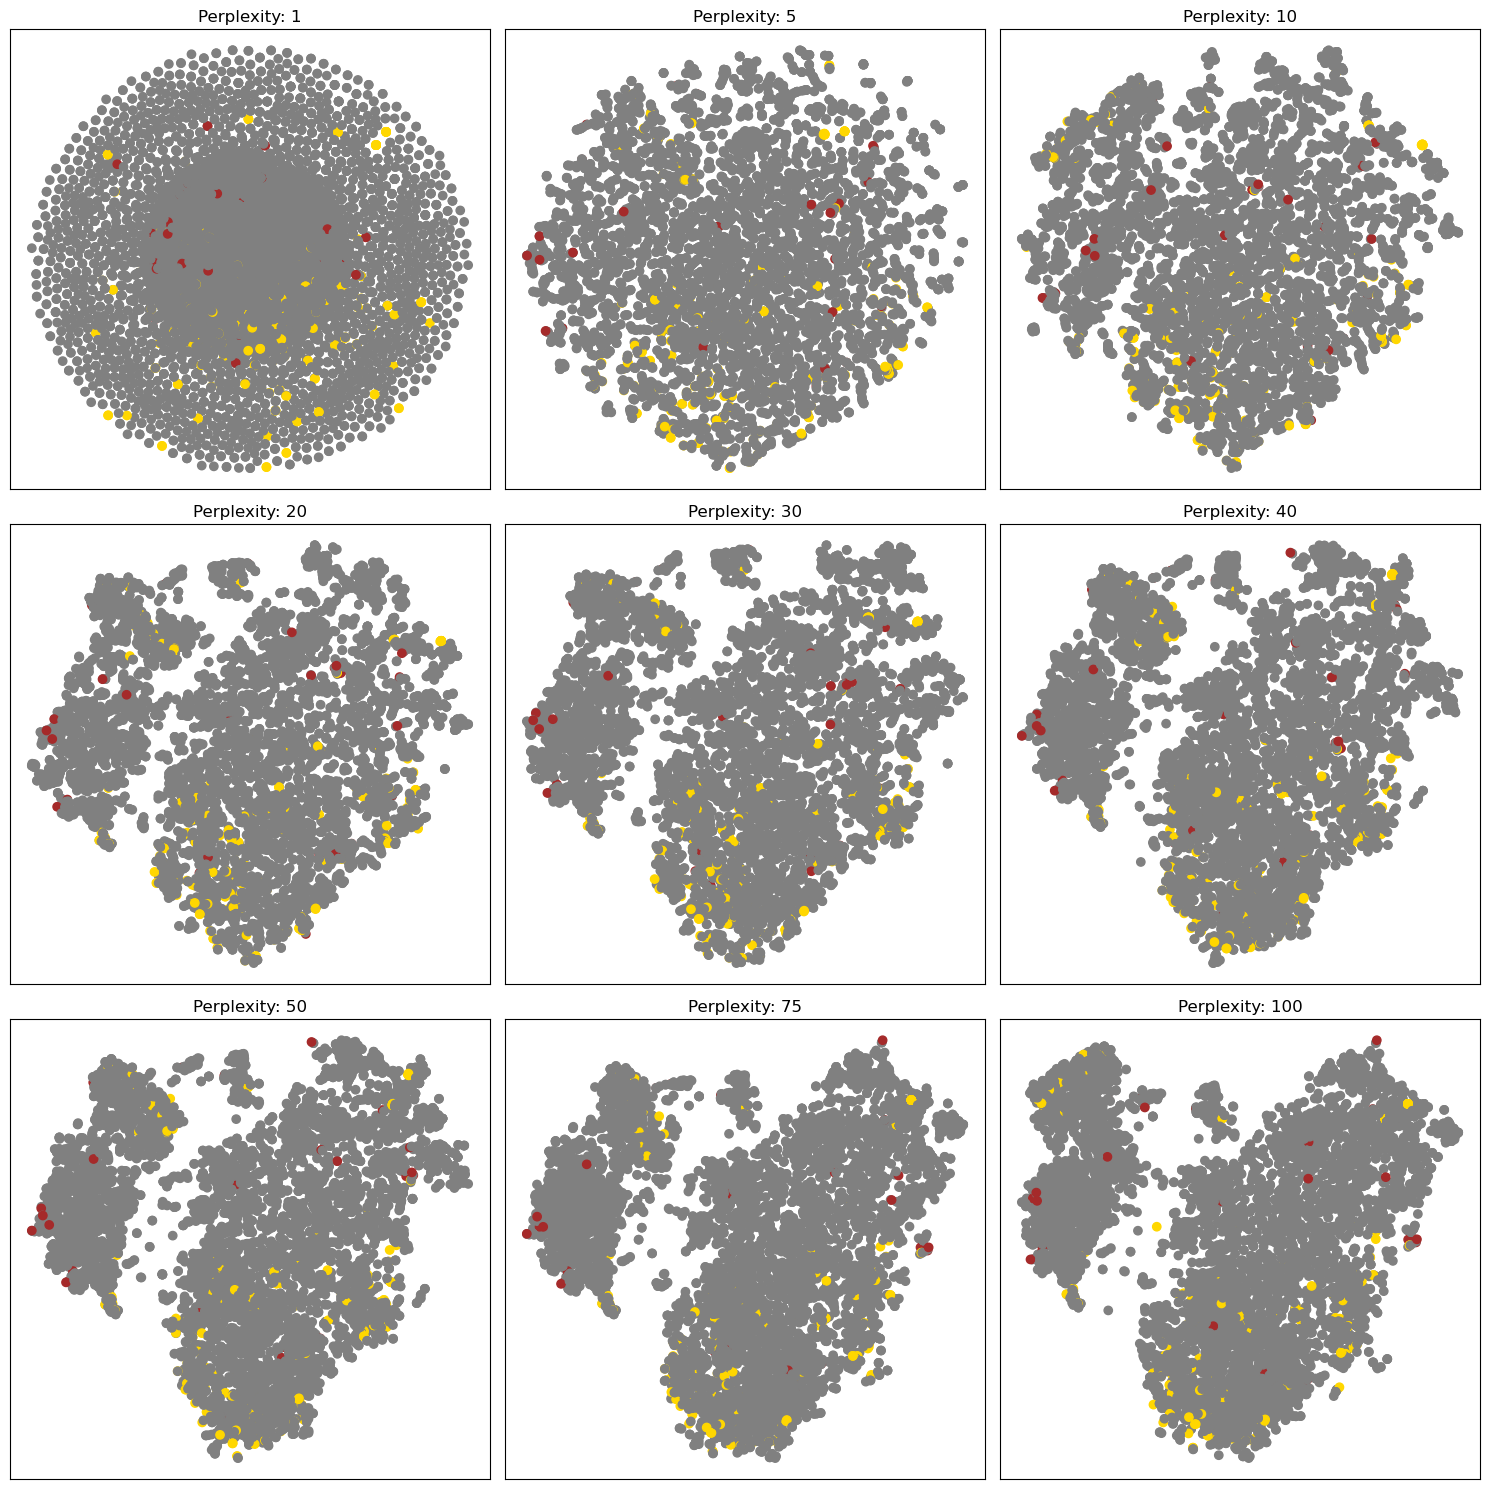

In [35]:
#now lets do it for quality
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

axs = axs.flatten()

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=1000, learning_rate=200)
    tsne_results = tsne.fit_transform(features_scaled)
    
    tsne_df = pd.DataFrame(data=tsne_results, columns=['Dim1', 'Dim2'])
    
    tsne_df['Quality_Category'] = df['Quality_Category']
    
    scatter = axs[i].scatter(tsne_df['Dim1'], tsne_df['Dim2'], 
                             c=tsne_df['Quality_Category'].map({'low': 'brown', 
                                                                'average': 'grey', 
                                                                'high': 'gold'}))
    axs[i].set_title(f'Perplexity: {perplexity}')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.tight_layout()
plt.show()

## Clustering

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 6497 samples in 0.008s...
[t-SNE] Computed neighbors for 6497 samples in 1.235s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6497
[t-SNE] Computed conditional probabilities for sample 2000 / 6497
[t-SNE] Computed conditional probabilities for sample 3000 / 6497
[t-SNE] Computed conditional probabilities for sample 4000 / 6497
[t-SNE] Computed conditional probabilities for sample 5000 / 6497
[t-SNE] Computed conditional probabilities for sample 6000 / 6497
[t-SNE] Computed conditional probabilities for sample 6497 / 6497
[t-SNE] Mean sigma: 0.860421
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.570129
[t-SNE] KL divergence after 1000 iterations: 1.316018


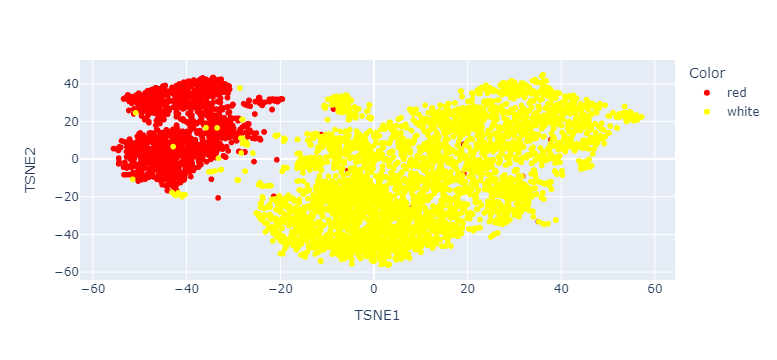

In [151]:
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=1000, learning_rate=200)

tsne_results = tsne.fit_transform(features_scaled)

tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])

# Add the color and quality labels to the DataFrame
tsne_df['Color'] = df['color']
tsne_df['Quality'] = df['quality']

#plot
fig = px.scatter(tsne_df, 
                 x='TSNE1', 
                 y='TSNE2', 
                 color='Color', 
                 color_discrete_map={'red': 'red', 'white': 'yellow'},  # Set the color mapping
                 hover_data=['Quality'])  # Add quality as hover data# Show the plot
fig.show()

In [163]:
from sklearn.cluster import KMeans

#cluster!
kmeans = KMeans(n_clusters=2, random_state= 123)
kmeans.fit(tsne_results)

tsne_df['Cluster'] = kmeans.labels_

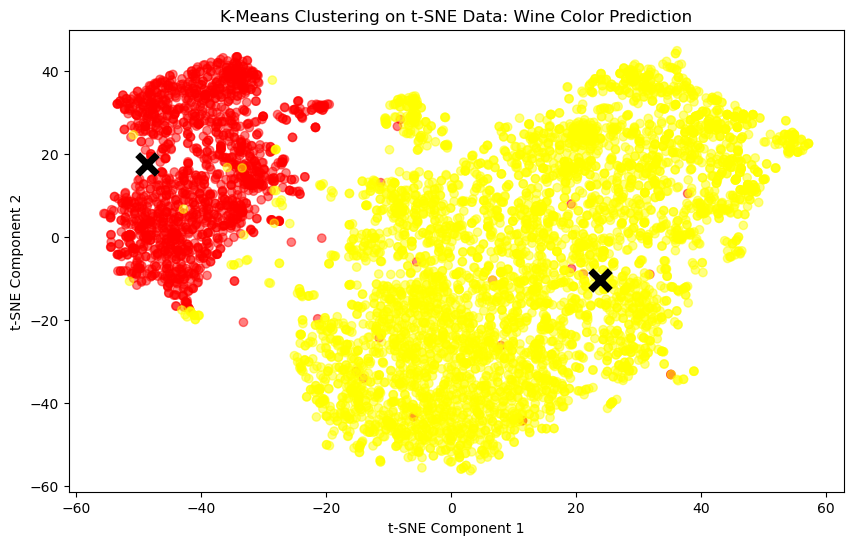

In [165]:
# Map colors
color_map = {'red': 'red', 'white': 'yellow'}
colors = tsne_df['Color'].map(color_map)

#plot
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=colors, alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker="x", s=200, linewidths=5, color='black')
plt.title('K-Means Clustering on t-SNE Data: Wine Color Prediction')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [169]:
cluster_0_color = 'red' if sum(tsne_df[tsne_df['Cluster'] == 0]['Color'] == 'red') > sum(tsne_df[tsne_df['Cluster'] == 0]['Color'] == 'white') else 'white'
cluster_1_color = 'red' if sum(tsne_df[tsne_df['Cluster'] == 1]['Color'] == 'red') > sum(tsne_df[tsne_df['Cluster'] == 1]['Color'] == 'white') else 'white'# Map the clusters to the predicted colors
cluster_to_color = {0: cluster_0_color, 1: cluster_1_color}
predicted_colors = tsne_df['Cluster'].map(cluster_to_color)

accuracy = accuracy_score(tsne_df['Color'], predicted_colors)
print(f"K-Means Clustering Accuracy after t-SNE: {accuracy:.2f}")

K-Means Clustering Accuracy after t-SNE: 0.96


## Now, Let's test for accuracy

In [175]:
from sklearn.model_selection import train_test_split

X = tsne_df[['TSNE1', 'TSNE2']]
y = tsne_df['Color']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Calculate the baseline accuracy
baseline_accuracy = max(y_test.value_counts()) / len(y_test)
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")

Baseline Accuracy: 0.77


In [159]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import numpy as np

# Train
kmeans = KMeans(n_clusters=2, random_state=123)
kmeans.fit(X_train)

# Predict
kmeans_labels = kmeans.predict(X_test)

# Determine the majority actual color in each cluster
actual_labels = np.array(y_test)
cluster_0_majority = 'red' if sum(actual_labels[kmeans_labels == 0] == 'red') > sum(actual_labels[kmeans_labels == 0] == 'white') else 'white'
cluster_1_majority = 'red' if sum(actual_labels[kmeans_labels == 1] == 'red') > sum(actual_labels[kmeans_labels == 1] == 'white') else 'white'# Create a dictionary to map clusters to colors
cluster_to_color = {0: cluster_0_majority, 1: cluster_1_majority}

# Assign the predicted colors based on the cluster-to-color mapping
predicted_colors = [cluster_to_color[label] for label in kmeans_labels]

#accuracy
kmeans_accuracy = accuracy_score(y_test, predicted_colors)
print(f"K-Means Clustering Accuracy: {kmeans_accuracy:.2f}")

K-Means Clustering Accuracy: 0.95


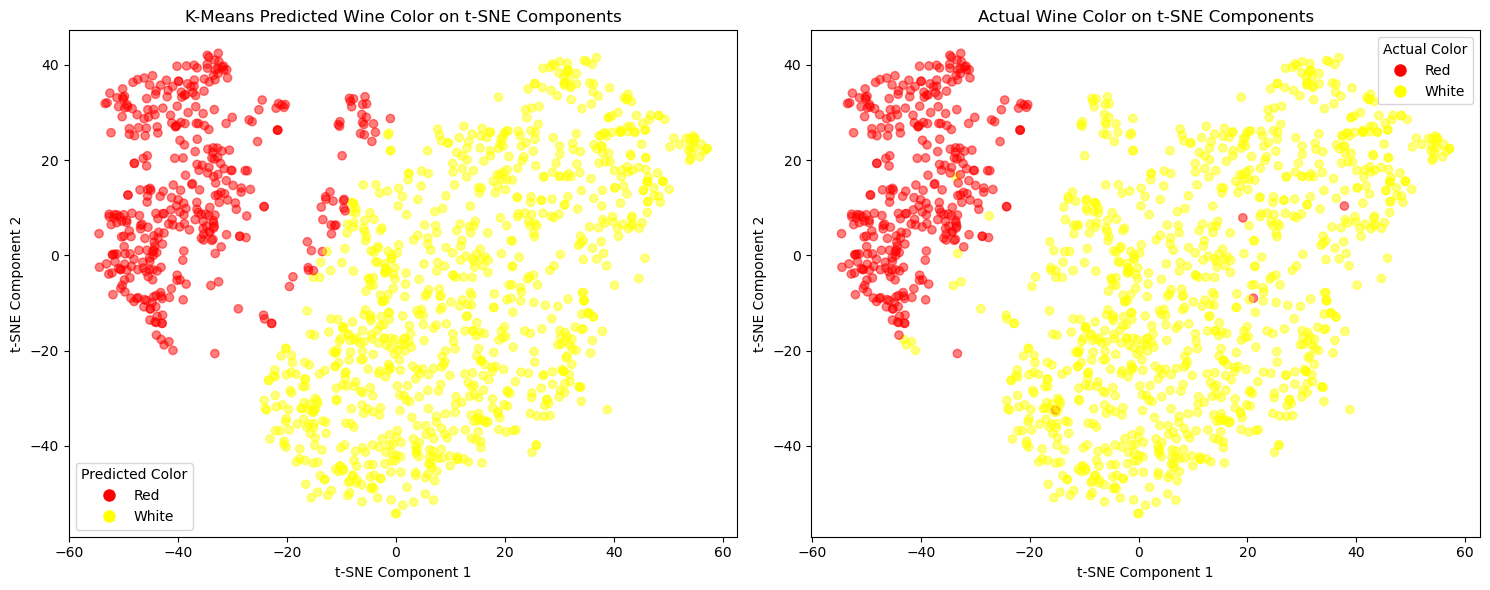

In [161]:
# Map the actual colors
actual_color_map = {'red': 'red', 'white': 'yellow'}
actual_colors_mapped = [actual_color_map[color] for color in y_test]

# Map the predicted colors
predicted_color_map = {'red': 'red', 'white': 'yellow'}
predicted_colors_mapped = [predicted_color_map[color] for color in predicted_colors]

#plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#predicted
axes[0].scatter(X_test['TSNE1'], X_test['TSNE2'], c=predicted_colors_mapped, alpha=0.5)
axes[0].set_title('K-Means Predicted Wine Color on t-SNE Components')
axes[0].set_xlabel('t-SNE Component 1')
axes[0].set_ylabel('t-SNE Component 2')

#actual
axes[1].scatter(X_test['TSNE1'], X_test['TSNE2'], c=actual_colors_mapped, alpha=0.5)
axes[1].set_title('Actual Wine Color on t-SNE Components')
axes[1].set_xlabel('t-SNE Component 1')
axes[1].set_ylabel('t-SNE Component 2')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Red'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='White')]
axes[0].legend(title='Predicted Color', handles=handles)
axes[1].legend(title='Actual Color', handles=handles)

plt.tight_layout()
plt.show()